# -------------------
# Rafi Fadhlillah
# 121450143
# Deep Learning RC

## Membuat Data Dummy
Data medis pasien (gejala, riwayat medis)

In [1]:
import random
import pandas as pd

# Asosiasi gejala, riwayat medis, dan penyakit
data_mapping = [
    {
        "penyakit": "flu",
        "gejala": ["demam", "batuk", "pusing", "kelelahan"],
        "riwayat": ["asma", "bronkitis"]
    },
    {
        "penyakit": "migrain",
        "gejala": ["sakit kepala", "pusing", "mual"],
        "riwayat": ["migren"]
    },
    {
        "penyakit": "serangan jantung",
        "gejala": ["nyeri dada", "sesak napas", "keringat dingin"],
        "riwayat": ["penyakit jantung", "hipertensi"]
    },
    {
        "penyakit": "gastritis",
        "gejala": ["sakit perut", "mual", "muntah"],
        "riwayat": ["gastrointestinal"]
    },
    {
        "penyakit": "infeksi saluran pernapasan",
        "gejala": ["demam", "batuk", "sesak napas"],
        "riwayat": ["bronkitis", "asma"]
    },
    {
        "penyakit": "diabetes mellitus",
        "gejala": ["kelelahan", "sakit kepala", "nyeri dada"],
        "riwayat": ["diabetes"]
    },
    {
        "penyakit": "hipertensi akut",
        "gejala": ["sakit kepala", "nyeri dada", "pusing"],
        "riwayat": ["hipertensi", "kolesterol tinggi"]
    }
]

# Fungsi untuk membuat data dummy yang sesuai
def generate_dummy_data(num_samples):
    data = []
    for _ in range(num_samples):
        # Pilih penyakit secara acak
        disease = random.choice(data_mapping)
        penyakit = disease["penyakit"]

        # Pilih gejala dan riwayat medis sesuai dengan penyakit
        gejala = ", ".join(random.sample(disease["gejala"], k=random.randint(2, len(disease["gejala"]))))
        riwayat = random.choice(disease["riwayat"])

        data.append({"Gejala": gejala, "Riwayat": riwayat, "Penyakit": penyakit})
    return pd.DataFrame(data)

# Buat data dummy sebanyak 1000 sampel
df = generate_dummy_data(1000)
df.head()

,Gejala,Riwayat,Penyakit
0,"nyeri dada, sakit kepala",diabetes,diabetes mellitus
1,"sesak napas, nyeri dada",penyakit jantung,serangan jantung
2,"mual, sakit kepala, pusing",migren,migrain
3,"muntah, sakit perut",gastrointestinal,gastritis
4,"nyeri dada, keringat dingin",penyakit jantung,serangan jantung


## Preprocessing Data

In [2]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from sklearn.preprocessing import LabelEncoder

# Preprocess data
texts = (df["Gejala"] + " " + df["Riwayat"]).tolist()
labels = df["Penyakit"].tolist()

# Tokenize the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1

# Pad sequences
max_length = max(len(s) for s in sequences)
X = pad_sequences(sequences, maxlen=max_length, padding='post')

# Encode labels using LabelEncoder instead of Tokenizer
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(labels)

## Model RNN

Algoritma Identifikasi Penyakit dengan RNN
```
1: procedure IDENTIFIKASI_PENYAKIT(gejala, riwayat_medis, jumlah_neuron_tersembunyi, jumlah_kelas_penyakit)
2:    # Inisialisasi bobot
3:    W_xh = random_matrix(ukuran_input, jumlah_neuron_tersembunyi)
4:    W_hh = random_matrix(jumlah_neuron_tersembunyi, jumlah_neuron_tersembunyi)
5:    W_hy = random_matrix(jumlah_neuron_tersembunyi, jumlah_kelas_penyakit)
6:    b_h = zeros(jumlah_neuron_tersembunyi)
7:    b_y = zeros(jumlah_kelas_penyakit)
8:
9:    # Forward pass
10:   hidden_state = zeros(jumlah_neuron_tersembunyi)
11:   for t in range(len(gejala)):
12:       input_at_t = gejala[t] + riwayat_medis[t]  # Gabungkan gejala dan riwayat medis
13:       hidden_state = activation(np.dot(input_at_t, W_xh) + np.dot(hidden_state, W_hh) + b_h)
14:       output = np.dot(hidden_state, W_hy) + b_y
15:
16:   # Softmax untuk probabilitas kelas
17:   probabilitas = softmax(output)
18:
19:   # Kembalikan indeks kelas dengan probabilitas tertinggi
20:   prediksi = np.argmax(probabilitas)
21:   return prediksi
```



Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.6264 - loss: 1.4264 - val_accuracy: 0.9600 - val_loss: 0.2873
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9712 - loss: 0.1760 - val_accuracy: 0.9850 - val_loss: 0.0673
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9922 - loss: 0.0521 - val_accuracy: 0.9950 - val_loss: 0.0378
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9808 - loss: 0.0428 - val_accuracy: 0.9750 - val_loss: 0.0398
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9905 - loss: 0.0366 - val_accuracy: 0.9950 - val_loss: 0.0291
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9831 - loss: 0.0300 - val_accuracy: 0.9750 - val_loss: 0.0442
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9848 - loss: 0.0298 - val_accuracy: 0.9950 - val_loss: 0.0234
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9779 - loss: 0.0353 - val_accuracy: 0.9950 - val_loss: 0.0222


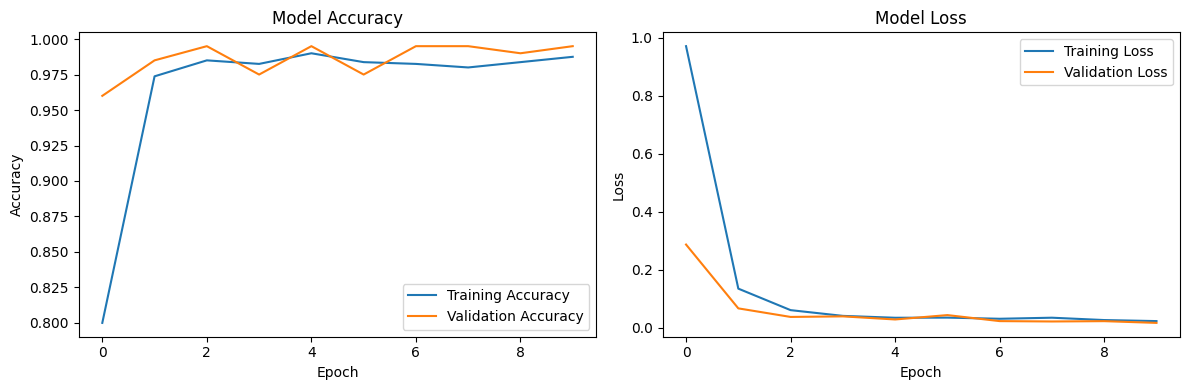

In [3]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import matplotlib.pyplot as plt

# Convert labels to one-hot encoding
y = to_categorical(y, num_classes=len(label_encoder.classes_))

# Define the RNN model
model = Sequential()
model.add(Embedding(vocab_size, 128, input_length=max_length))
model.add(SimpleRNN(128))  # Use SimpleRNN layer
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model and save training history
history = model.fit(X, y, epochs=10, batch_size=32, validation_split=0.2)

# Plot training & validation accuracy and loss
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [4]:
# Evaluate the model
loss, accuracy = model.evaluate(X, y, verbose=0)
print("Loss: ", loss)
print("Accuracy: ", accuracy)

# Example prediction
new_texts = ["demam, batuk, asma", "sakit kepala, pusing, migren"]
new_sequences = tokenizer.texts_to_sequences(new_texts)
new_X = pad_sequences(new_sequences, maxlen=max_length, padding='post')
predictions = model.predict(new_X)

# Decode predictions
predicted_labels = [label_encoder.classes_[np.argmax(prediction)] for prediction in predictions]
print("Predicted labels:", predicted_labels)


Loss:  0.022969966754317284
Accuracy:  0.9890000224113464
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
Predicted labels: ['infeksi saluran pernapasan', 'migrain']


In [5]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (32, 8, 128)                │           3,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn (SimpleRNN)               │ (32, 128)                   │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (32, 7)                     │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 111,383 (435.09 KB)

 Trainable params: 37,127 (145.03 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 74,256 (290.07 KB)